In [13]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

In [14]:
def make_system(alpha, beta, gamma, delta):
    
    init = System(x=1, y=1)
    init /= np.sum(init)

    t0 = 0
    t_end = 200

    return System(init=init, t0=t0, t_end=t_end,
                  alpha=alpha, beta=beta, gamma=gamma, delta=delta)

In [15]:
def update_func(state, t, system):
    """Update the SIR model.
    
    state: State(x, y)
    t: time
    system: System object
    
    returns: State(x, y)
    """
    unpack(system)
    x, y = state

    dxdt = alpha * x - beta * x * y
    dydt = delta * x * y - gamma * y
    
    x += dxdt
    y += dydt
    
    return State(x=x, y=y)

In [16]:
def run_simulation(system, update_func):
    """Runs a simulation of the system.
        
    system: System object
    update_func: function that updates state
    
    returns: TimeFrame
    """
    unpack(system)
    
    frame = TimeFrame(columns=init.index)
    frame.row[t0] = init
    
    for t in linrange(t0, t_end):
        frame.row[t+1] = update_func(frame.row[t], t, system)
    
    return frame

In [17]:
system = make_system(.05, .1, .1, .1)
print (system.init.x, system.init.y)
results = run_simulation(system, update_func)

0.5 0.5


,x,y
0,0.500000,0.500000
1,0.500000,0.475000
2,0.501250,0.451250
3,0.503694,0.428744
4,0.507283,0.407465
5,0.511977,0.387389
6,0.517742,0.368483
7,0.524551,0.350713
8,0.532382,0.334038
9,0.541218,0.318418


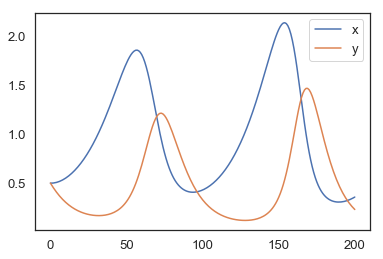

In [18]:
results.plot()